<a href="https://colab.research.google.com/github/farhanadhilah/Exploratory-Data-Analysis/blob/main/AshraeEnergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projek: Eksplorasi dan Visualisasi Data Lanjut - ASHRAE Energy**

Kelompok 2:
1. Suri Dian Pratama (2006614771)
2. Gabriella Aileen Mendrofa (2106779472)
3. Nadhilah Farhana (2106779516)


---


# **🚩ATTENTION**

Pastikan file **kaggle.json** yang terdapat dalam lampiran sudah terdownload dan tersimpan dalam device saudara sebelum _running code_ di bawah ini. Atau, saudara juga dapat menggunakan file **kaggle.json** milik pribadi untuk menghubungkan google colab dengan kaggle.


---



# **📚Loading Modul**

In [ ]:
#import modul/libraries yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---


# **⚡Load Dataset from Kaggle**

Loading dataset dilakukan langsung melalui kaggle untuk mempercepat proses pengambilan data. Untuk menghubungkan colab dengan kaggle dapat dilakukan melalui file API akun kaggle yang dimiliki. Download file API tersebut (kaggle.json) yang kemudian diupload dan menjadi penghubung antara colab dengan kaggle.


---



In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Pastikan sudah mendownload file kaggle.json untuk kemudian di upload
from google.colab import files
files.upload() #Upload file kaggle.json yang telah di download dari lampiran

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadilafrhn","key":"d7cbc9f75607c4238f7182300c5bfe8a"}'}

In [ ]:
#Membutuhkan izin akses google drive (bersifat temporary)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Mendownload data ashrae-energy-prediction dari kaggle
!kaggle competitions download -c ashrae-energy-prediction

 97% 367M/379M [00:02<00:00, 166MB/s]
100% 379M/379M [00:02<00:00, 154MB/s]


In [ ]:
#Mengecek file apa saja yang sudah terupload dalam google colab
!ls

ashrae-energy-prediction.zip  drive  kaggle.json  sample_data


In [ ]:
#File yang terdownload dari kaggle berbentuk zip. Code berikut digunakan untuk membuka zip file

import zipfile
zip_ref = zipfile.ZipFile('ashrae-energy-prediction.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

#Loading data training terlebih dahulu

building_metadata = pd.read_csv('/content/files/building_metadata.csv')
train = pd.read_csv('/content/files/train.csv')
weather_train = pd.read_csv('/content/files/weather_train.csv')


# ⏭**Data Training**


## **⏳Checking Data**

### **1. building_metadata**

In [ ]:
#Melihat data building_metadata untuk mengetahui gambaran data dan variabel dalam data

building_metadata.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
#Melihat tipe data dari masing-masing variabel

building_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
#Menghitung presentase missing values dari masing-masing variabel

(building_metadata.isnull().sum()/len(building_metadata)*100).to_frame('Persentase Missing "building_metadata" (%)')

,"Persentase Missing ""building_metadata"" (%)"
site_id,0.000000
building_id,0.000000
primary_use,0.000000
square_feet,0.000000
year_built,53.416149
floor_count,75.500345


### **2. train**

In [ ]:
#Melihat data train untuk mengetahui gambaran data dan variabel dalam data

train.head(5)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
#Melihat tipe data dari masing-masing variabel

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [ ]:
#Menghitung presentase missing values dari masing-masing variabel

(train.isnull().sum()/len(train)*100).to_frame('Persentase Missing "train" (%)')

,"Persentase Missing ""train"" (%)"
building_id,0.0
meter,0.0
timestamp,0.0
meter_reading,0.0


### **3. weather_train**

In [ ]:
#Melihat data weather_train untuk mengetahui gambaran data dan variabel dalam data

weather_train.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
#Melihat tipe data dari masing-masing variabel

weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [ ]:
#Menghitung presentase missing values dari masing-masing variabel

(weather_train.isnull().sum()/len(weather_train)*100).to_frame('Persentase Missing "weather_train" (%)')

#cloud_coverage dan precip_depth_1_hr memiliki nilai missing value yang besar, yaitu >30%

,"Persentase Missing ""weather_train"" (%)"
site_id,0.000000
timestamp,0.000000
air_temperature,0.039350
cloud_coverage,49.489529
dew_temperature,0.080845
precip_depth_1_hr,35.979052
sea_level_pressure,7.596603
wind_direction,4.484414
wind_speed,0.217496



## **✨Change Data Type**

In [ ]:
#Ubah tipe data
#Karena terdapat tipe data yang tidak sesuai, maka dilakukan proses perubahan tipe data sebagai berikut

building_metadata = building_metadata.astype({'primary_use':'category', 'building_id':'category','site_id':'category'})
train = train.astype({'timestamp':'datetime64[ns]', 'meter':'category','building_id':'category'})
weather_train = weather_train.astype({'timestamp':'datetime64[ns]','site_id':'category'})
'Done'

'Done'


## **🎒The Shape of Each Data Training**

In [ ]:
#Shape dari masing-masing data dapat memberikan informasi berupa ukuran baris dan kolom dari data tesebut dalam bentuk (baris, kolom)

print('Ukuran data building_metadata:', building_metadata.shape)
print('Ukuran data train:', train.shape)
print('Ukuran data weather_train:', weather_train.shape)

Ukuran data building_metadata: (1449, 6)
Ukuran data train: (20216100, 4)
Ukuran data weather_train: (139773, 9)




---


## **⭐Merging Data Train**

Untuk dapat melakukan _merging_ data, kita perlu terlebih dahulu mengetahui kolom mana yang dapat digunakan sebagai "penghubung" antar dataframe.


---



In [ ]:
#Cek apakah ada kolom yang sama antara data building_metadata, train, dan weather_train

common1 = building_metadata.columns.intersection(train.columns) #common column train antara building_metadata dan train
common2 = train.columns.intersection(weather_train.columns) #common column antara train dan weather_train
common3 = building_metadata.columns.intersection(weather_train.columns) #common column antara building_metadata dan weather_train
print('Common column 1:', common1)
print('Common column 2:', common2)
print('Common column 3:', common3)

Common column 1: Index(['building_id'], dtype='object')
Common column 2: Index(['timestamp'], dtype='object')
Common column 3: Index(['site_id'], dtype='object')




---


Karena variabel yang memiliki presentase missing value besar tidak menjadi _common column_, maka dapat **dihapus**. Variabel yang memiliki presentase _missing value_ yang besar, antara lain:
* building_metadata['year_built'] : 53.42%
* building_metadata['floor_count'] : 75.5%
* weather_train['cloud_coverage'] : 49.49%
* weather_train['precip_depth_1_hr'] : 35.98%


---

In [ ]:
#Menghapus variabel dengan presentase missing value >30%

del [[building_metadata['year_built'], building_metadata['floor_count'], weather_train['cloud_coverage'], weather_train['precip_depth_1_hr']]]



---


Cek kembali info masing-masing data setelah dilakukan penghapusan variabel


---



In [ ]:
print(building_metadata.info())
print('Ukuran building_metadata:', building_metadata.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   site_id      1449 non-null   category
 1   building_id  1449 non-null   category
 2   primary_use  1449 non-null   category
 3   square_feet  1449 non-null   int64   
dtypes: category(3), int64(1)
memory usage: 62.1 KB
None
Ukuran building_metadata: (1449, 4)


In [ ]:
print(weather_train.info())
print('Ukuran weather_train:', weather_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  category      
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float64       
 3   dew_temperature     139660 non-null  float64       
 4   sea_level_pressure  129155 non-null  float64       
 5   wind_direction      133505 non-null  float64       
 6   wind_speed          139469 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 6.5 MB
None
Ukuran weather_train: (139773, 7)




---


### **Probability of Merging Data**

1. Karena **building_metada** dengan **train** memiliki kolom yang sama yaitu 'building_id' maka kita dapat melakukan _merge_ pada kedua data tersebut melalui kolom 'building_id'.
2. Dari hasil merging data pada Poin (1), maka selanjutnya dapat dilakukan merging dengan data **weather_train** melalui kolom 'timestamp' dan 'site_id'.

#### **Alasan Penggunaan Merge untuk Menggabungkan Data**

Untuk melakukan penggabungan data pada pandas dataframe dapat dilakukan dalam tiga pilihan yaitu [1]:


* **merge()** untuk mnenggabungkan atau menggabungkan data pada index atau kolom umum (common column)
* **.join()** untuk menggabungkan data pada sebuah index atau sebuah kolom kunci (key column)
* **concat()** untuk menggabungkan DataFrames di seluruh baris atau kolom

Terdapat berbagai bentuk gabungan pada **merge()**, yaitu: **inner, outer, left, dan right**. Dengan _outer join_, kita akan menggabungkan data berdasarkan semua kunci di objek kiri, objek kanan, atau keduanya. Untuk _key_ yang hanya ada di satu objek, kolom yang tidak cocok di objek lain akan diisi dengan NaN (bukan angka). Karena data yang digunakan pada penelitian ini memiliki _common column_, maka dipilih proses **merge()** untuk menggabungkan ketiga dataframe (building_metadata, train, dan weather_train).

##### **Referensi**
[1] https://realpython.com/pandas-merge-join-and-concat/



---



In [ ]:
#Merging data building_metadata dan train melalui kolom 'building_id'

merge_buildtrain = train.merge(building_metadata, how='left', on='building_id')
merge_buildtrain.head(5)

#Data train berada di sebelah kiri (karena menggunakan opsi 'left') dan building_metadata berada di sebelah kanan

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet
0,0,0,2016-01-01,0.0,0,Education,7432
1,1,0,2016-01-01,0.0,0,Education,2720
2,2,0,2016-01-01,0.0,0,Education,5376
3,3,0,2016-01-01,0.0,0,Education,23685
4,4,0,2016-01-01,0.0,0,Education,116607


In [ ]:
#Cek kembali ukuran data setelah dilakukan merging

merge_buildtrain.shape

#Ukuran awal data building_metada adalah (1449, 4) dan ukuran awal data train adalah (20216100, 4)
#Karena kedua data digabungkan melalui satu kolom yang sama, maka ukuran yang diperoleh telah sesuai yaitu (20216100, 7)

(20216100, 7)

In [ ]:
#Merging kedua antara data merge_buildtrain dan weather_train melalui kolom 'timestamp' dan 'site_id'

train_merge = merge_buildtrain.merge(weather_train, how='left', on=['timestamp','site_id'])
train_merge.tail(5)

#Data merge_buildtrain berada di sebelah kiri (karena menggunakan opsi 'left') dan weather_train berada di sebelah kanan

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1.7,-5.6,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,1.7,-5.6,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1.7,-5.6,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,1.7,-5.6,1008.5,180.0,8.8
20216099,1448,0,2016-12-31 23:00:00,2.850,15,Office,92271,1.7,-5.6,1008.5,180.0,8.8


In [ ]:
#Cek kembali ukuran data setelah dilakukan merging

train_merge.shape

#Ukuran awal data merge_buildtrain adalah (20216100, 7) dan ukuran awal data weather_train adalah (139773, 7)
#Karena kedua data digabungkan melalui dua kolom yang sama, maka ukuran yang diperoleh telah sesuai yaitu (20216100, 12)

(20216100, 12)


## **✂Release Memory**

Untuk menghemat penggunaan memori, akan dilakukan _deleting_ beberapa dataframe yang sudah tidak terpakai.

In [ ]:
#Menghapus dataframe dan variabel yang sudah tidak digunakan lagi
#Variabel building_id dihapus karena sudah tidak terpakai lagi sebagai foreign key dan tidak informatif

del [[train, weather_train, merge_buildtrain, train_merge['building_id']]]
'Done'

'Done'

In [ ]:
#Cek info data masing-masing variabel setelah selesai dilakukan proses merging data

train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   meter               category      
 1   timestamp           datetime64[ns]
 2   meter_reading       float64       
 3   site_id             category      
 4   primary_use         category      
 5   square_feet         int64         
 6   air_temperature     float64       
 7   dew_temperature     float64       
 8   sea_level_pressure  float64       
 9   wind_direction      float64       
 10  wind_speed          float64       
dtypes: category(3), datetime64[ns](1), float64(6), int64(1)
memory usage: 1.4 GB



## **❗Revision of Measurement for meter_reading in site_id == 0**

Terdapat perbedaan satuan 'meter_reading' untuk 'site_id' == 0, yaitu yang seharusnya memiliki satuan kWh tetapi pada data satuannya adalah kBTU. Oleh karena itu perlu dilakukan transformasi satuan dari kBTU menjadi kWh dengan mengalikan nilai 'meter_reading' untuk 'site_id' == 0 dengan 0.2931.

In [ ]:
train_merge[train_merge['site_id']==0]['meter_reading'].multiply(0.2931)
train_merge.tail(5)

,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
20216095,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1.7,-5.6,1008.5,180.0,8.8
20216096,0,2016-12-31 23:00:00,4.825,15,Education,4298,1.7,-5.6,1008.5,180.0,8.8
20216097,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1.7,-5.6,1008.5,180.0,8.8
20216098,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,1.7,-5.6,1008.5,180.0,8.8
20216099,0,2016-12-31 23:00:00,2.850,15,Office,92271,1.7,-5.6,1008.5,180.0,8.8




---


## **🔰Correlation Check**

Proses correlation dilakukan check untuk melihat apakah terdapat variabel yang memiliki korelasi yang kuat $(\geq 0.75)$. Variabel yang memiliki korelasi yang kuat akan dihapus karena informasi data dapat diwakilkan oleh salah satu variabel. Dalam hal ini, kami memilih untuk menghapus variabel yang memiliki _missing value_ lebih banyak daripada variabel lain.


---






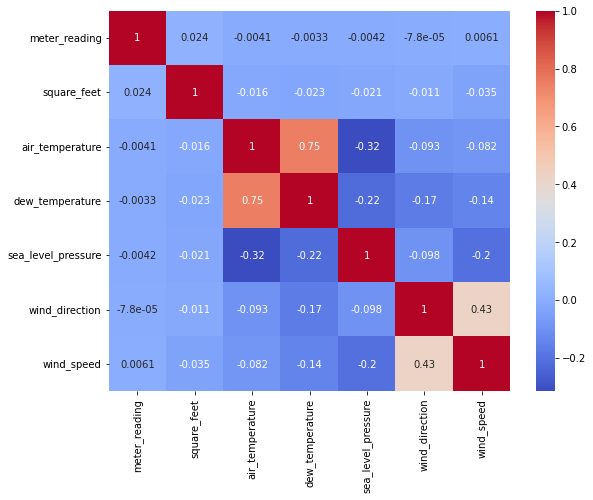

In [ ]:
#Correlation check masing-masing variabel

plt.figure(figsize=(9,7))
sns.heatmap(train_merge.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
#Melihat presentase missing value masing-masing variabel dari data yang sudah selesai di merge (train_merge)

percent_missing = train_merge.isnull().sum() * 100 / len(train_merge)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value

,percent_missing
meter,0.000000
timestamp,0.000000
meter_reading,0.000000
site_id,0.000000
primary_use,0.000000
square_feet,0.000000
air_temperature,0.478124
dew_temperature,0.495348
sea_level_pressure,6.092515
wind_direction,7.167792


In [ ]:
#Variabel dew_temperature dihapus karena memiliki nilai missing value yang lebih besar dibandingkan dengan variabel air_temperature

del [[train_merge['dew_temperature']]]
'Done'

'Done'


## **⌨Handling Outliers and Missing Values**

### **1. Checking Outliers**

Outliers dapat dideteksi dengan cara membandingkan nilai mean dan median masing-masing variabel. Apabila perbedaan nilai mean dan mediannya terlampau jauh, maka dapat dikatakan ada ketimpangan nilai data atau outliers.

In [ ]:
#Statistika dekskriptif untuk tipe data 'selain' category

train_merge.describe().transpose()

#Terlihat bahwa mean dan median pada variabel 'meter_reading' dan 'square_feet' berbeda jauh

,count,mean,std,min,25%,50%,75%,max
meter_reading,20216100.0,2117.121076,153235.624995,0.0,18.3,78.775,267.984,21904700.0
square_feet,20216100.0,107782.981330,117142.443647,283.0,32527.0,72709.000,139113.000,875000.0
air_temperature,20119442.0,15.987953,10.947293,-28.9,8.6,16.700,24.100,47.2
sea_level_pressure,18984431.0,1016.085487,7.060539,968.2,1011.6,1016.000,1020.500,1045.5
wind_direction,18767052.0,173.015104,114.057364,0.0,70.0,180.000,280.000,360.0
wind_speed,20072424.0,3.377525,2.265694,0.0,2.1,3.100,4.600,19.0


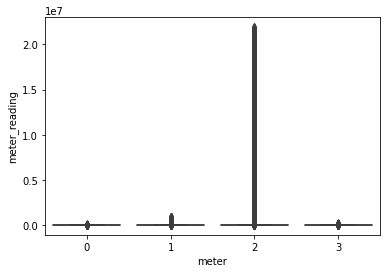

In [ ]:
#Visualisasi outliers pada variabel 'meter_reading'

p = sns.boxplot(x="meter", y="meter_reading", data=train_merge)

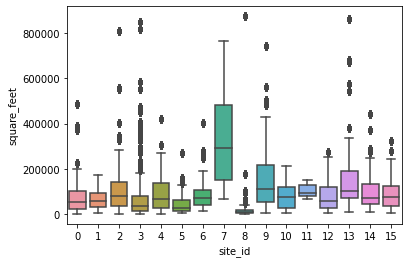

In [ ]:
#Visualisasi outliers pada variabel 'square_feet'

p = sns.boxplot(x="site_id", y="square_feet", data=train_merge)

In [ ]:
#Statistika dekskriptif untuk tipe data category

train_merge.select_dtypes(include='category').describe().transpose()

#Untuk variabel 'meter' terlihat bahwa penggunaan energi paling banyak untuk electricity
#Untuk variabel 'site_id' data paling banyak berasal dari site 13
#Untuk variabel 'primary_use' mayoritas gedung yang ada pada data adalah gedung untuk education

,count,unique,top,freq
meter,20216100,4,0,12060910
site_id,20216100,16,13,2711763
primary_use,20216100,16,Education,8165504


### **2. Handling Outliers**

Tranformasi log adalah salah satu metode penanganan outliers yang tidak melakukan penghapusan data, namun memperkecil interval data. Selain menangani outliers, transformasi log juga membantu mengoreksi distribusi variabel. Data hasil handling outliers dapat digunakan untuk tahap berikutnya, yaitu pemodelan.

In [ ]:
#Transformasi log untuk variabel 'meter_reading' dan 'square_feet'

train_merge["log_meter_reading"] = train_merge["meter_reading"].map(lambda i: np.log(i) if i > 0 else 0)
train_merge["log_square_feet"] = train_merge["square_feet"].map(lambda i: np.log(i) if i > 0 else 0)
train_merge.head(5)

#Hasil transformasi diletakkan pada kolom baru, yaitu 'log_meter_reading' dan 'log_square_feet'

,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
0,0,2016-01-01,0.0,0,Education,7432,25.0,1019.7,0.0,0.0,0.0,8.913550
1,0,2016-01-01,0.0,0,Education,2720,25.0,1019.7,0.0,0.0,0.0,7.908387
2,0,2016-01-01,0.0,0,Education,5376,25.0,1019.7,0.0,0.0,0.0,8.589700
3,0,2016-01-01,0.0,0,Education,23685,25.0,1019.7,0.0,0.0,0.0,10.072597
4,0,2016-01-01,0.0,0,Education,116607,25.0,1019.7,0.0,0.0,0.0,11.666565


In [ ]:
#Melihat presentase missing value masing-masing variabel dari data yang sudah selesai di merge (train_merge)

percent_missing = train_merge.isnull().sum() * 100 / len(train_merge)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value

,percent_missing
meter,0.000000
timestamp,0.000000
meter_reading,0.000000
site_id,0.000000
primary_use,0.000000
square_feet,0.000000
air_temperature,0.478124
sea_level_pressure,6.092515
wind_direction,7.167792
wind_speed,0.710701




---


### **3. Handling Missing Values**

Sebelum melakukan penanganan missing values, kita terlebih dahulu harus mengetahui jenis penanganan missing value yang sesuai untuk data tersebut. Salah satu cara yang dapat dilakukan adalah dengan melihat pola data. Pada penelitian ini data terindikasi bersifat _timeseries_ dengan tren _seasonal_. Untuk meilhat apakah indikasi tersebut benar, akan dilakukan ploting data sebagai berikut.


---





In [ ]:
#Untuk melakukan plot seasonal keterangan waktu pada data (timestamp) harus diubah menjadi kolom index

training = train_merge.set_index(pd.DatetimeIndex(train_merge['timestamp']))

In [ ]:
#Data di rata-ratakan perbulan untuk melihat perubahan pola data di setiap bulan

train_month = training.resample("M").mean() #dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
train_month.head()

#Perhatikan timestamp mulai pada bulan januari tahun 2016

,meter_reading,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
timestamp,,,,,,,,
2016-01-31,1150.157976,107898.608295,3.700570,1017.138719,182.105752,3.488169,3.880882,11.041655
2016-02-29,1208.032126,109273.938290,7.338876,1017.528394,186.401587,3.738615,3.921049,11.038787
2016-03-31,4897.649796,109354.515895,12.664957,1015.225049,171.491643,3.717702,3.892044,11.036765
2016-04-30,5566.060718,107194.946708,14.105422,1015.375830,171.839560,3.805737,3.925124,11.036990
2016-05-31,5183.869585,107287.005919,18.690666,1014.022376,164.758955,3.267256,4.007474,11.036584


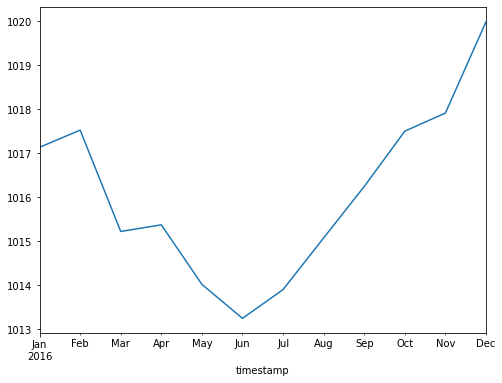

In [ ]:
#Pola data bulanan sea_level_pressure secara keseluruhan

p = train_month['sea_level_pressure'].plot(figsize=(8, 6))

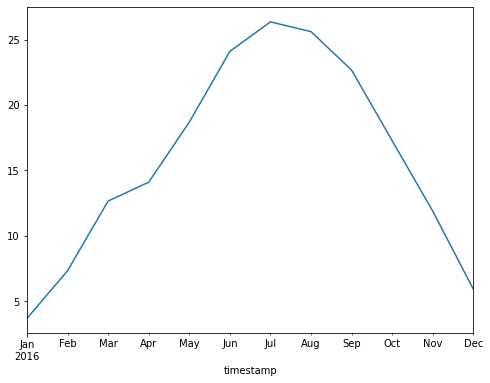

In [ ]:
#Pola data bulanan air_temperature secara keseluruhan

p = train_month['air_temperature'].plot(figsize=(8, 6))

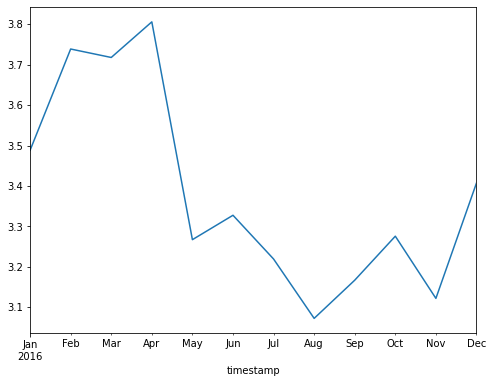

In [ ]:
#Pola data bulanan wind_speed secara keseluruhan

p = train_month['wind_speed'].plot(figsize=(8, 6))

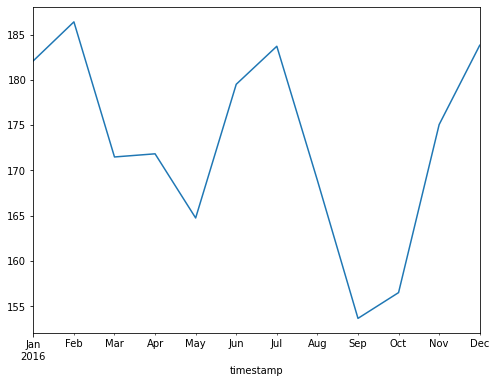

In [ ]:
#Pola data bulanan wind_direction secara keseluruhan

p = train_month['wind_direction'].plot(figsize=(8, 6))

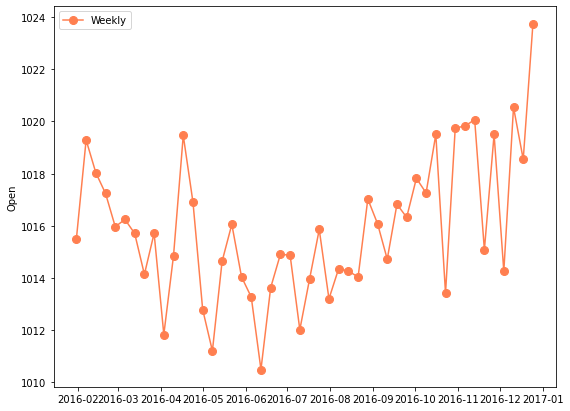

In [ ]:
#Pola data mingguan untuk sea_level_pressure secara keseluruhan

train_week = training.resample("W").mean()
start, end = '2016-01-31', '2016-12-31'
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(train_week.loc[start:end, 'sea_level_pressure'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Open")
ax.legend()
plt.show()



---


### **4. Imputation**

Proses imputasi dilakukan menggunakan interpolasi linear, karena berdasarkan plot data sebelumnya terlihat bahwa terdapat tren seasonal pada data. Hal tersebut ditandai dengan adanya pola berulang atau kecenderungan naik-turun seiring berjalannya waktu. **Interpolasi linear** adalah teknik imputasi yang mengasumsikan hubungan linier antara titik data. Interpolasi linear menggunakan nilai data yang ada dan berdekatan untuk menghitung nilai data yang hilang _(missing value)_.


---



In [ ]:
#Variabel yang memiliki missing values adalah 'wind_speed','air_temperature','sea_level_pressure', dan 'wind_direction'

x = ['wind_speed','air_temperature','sea_level_pressure',	'wind_direction']
for i in x:
  train_merge[i].interpolate(limit_direction="both",inplace=True)
train_merge.sample(5)

,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
4132317,0,2016-03-19 10:00:00,179.8630,4,Education,55516,12.8,1017.0,280.0,3.1,5.192195,10.924427
4092173,0,2016-03-18 15:00:00,53.4100,3,Education,61151,15.6,1014.5,250.0,5.7,3.977998,11.021101
19630935,0,2016-12-21 16:00:00,96.3700,2,Retail,45224,16.1,1019.3,60.0,3.1,4.568195,10.719383
11897464,1,2016-08-05 16:00:00,87.3234,2,Entertainment/public assembly,11935,25.0,1009.1,360.0,7.7,4.469618,9.387231
17164941,0,2016-11-07 10:00:00,522.6910,14,Healthcare,200000,3.3,1030.3,340.0,3.1,6.258990,12.206073


In [ ]:
#Cek kembali missing values setelah dilakukan proses imputasi

print(train_merge.isnull().sum())
print('Keterangan: Sudah tidak terdapat missing values pada data')

meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
sea_level_pressure    0
wind_direction        0
wind_speed            0
log_meter_reading     0
log_square_feet       0
dtype: int64
Keterangan: Sudah tidak terdapat missing values pada data



## **☕Data Visualization and Insight Generation**

In [ ]:
#Berapa banyak gedung untuk masing-masing penggunaan?
#Untuk melihat penggunaan gedung paling banyak

train_merge.primary_use.value_counts()

Education                        8165504
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

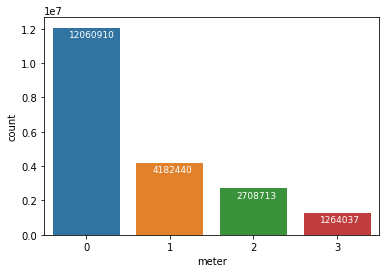

In [ ]:
#Berapa banyak gedung untuk masing-masing sumber keluaran energi?

ax=sns.countplot(x=train_merge['meter'], data=train_merge);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=9)

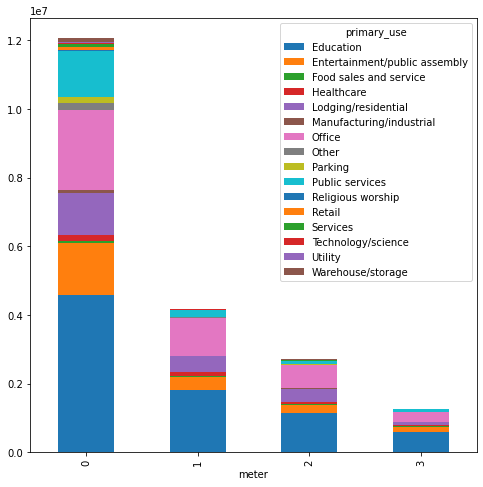

In [ ]:
#Setiap jenis sumber keluaran energi didominasi oleh gedung education

CT = pd.crosstab(index=train_merge["meter"], columns=train_merge["primary_use"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)



---


Plot data penggunaan energi untuk jenis keluaran tertentu, yaitu:

* 0: electricity
* 1: chilledwater
* 2: steam
* 3: hotwater



---



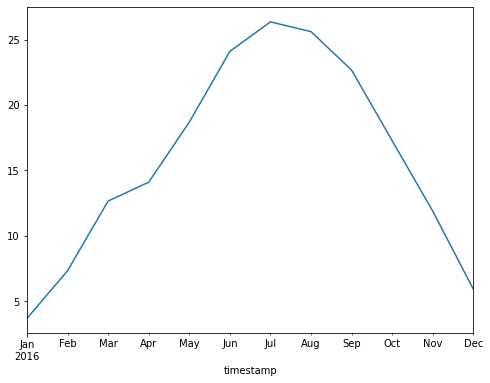

In [ ]:
#Plot rata-rata bulanan variabel 'air_temperature'

p = train_month['air_temperature'].plot(figsize=(8, 6))

#### **0: electricity**

In [ ]:
df_meter0 = training.loc[training['meter'] == 0] #electricity
train_month_meter0 = df_meter0.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
train_month_meter0.head()

,meter_reading,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
timestamp,,,,,,,,
2016-01-31,149.312766,92649.696414,4.675218,1017.042968,186.682841,3.728188,3.667321,10.796156
2016-02-29,154.980076,93115.667915,7.792009,1017.651466,190.015813,3.970514,3.677310,10.782073
2016-03-31,149.326638,93257.382952,12.787870,1015.770496,174.642058,3.900270,3.623860,10.777811
2016-04-30,148.438191,92293.923869,14.262656,1015.676120,174.809693,3.992840,3.661974,10.790112
2016-05-31,157.954128,92529.309057,18.465819,1014.360111,167.321538,3.401165,3.768920,10.790240


In [ ]:
#Jumlah masing-masing jenis penggunaan gedung dengan electricity

df_meter0.primary_use.value_counts()

Education                        4597256
Office                           2310203
Entertainment/public assembly    1511295
Public services                  1320045
Lodging/residential              1229082
Other                             210764
Parking                           187447
Healthcare                        184345
Warehouse/storage                 103077
Retail                             96618
Manufacturing/industrial           85216
Services                           78951
Technology/science                 45275
Food sales and service             43826
Utility                            32476
Religious worship                  25034
Name: primary_use, dtype: int64

In [ ]:
#Persentase masing-masing jenis penggunaan gedung dengan electricity

y = ['Education','Lodging/residential','Office','Entertainment/public assembly','Other','Retail','Parking',
     'Public services','Warehouse/storage','Food sales and service','Religious worship','Healthcare','Utility','Technology/science',
     'Manufacturing/industrial','Services']
df0 = []
for i in y:
  df0.append(round(len(df_meter0.loc[df_meter0['primary_use'] == i])*100 / len(train_merge.loc[train_merge['primary_use'] == i]),2))

df0 = pd.DataFrame(list(zip(y, df0)), columns =['primary_use', 'Persentase gedung dengan electricity (%)'])
df0

,primary_use,Persentase gedung dengan electricity (%)
0,Education,56.30
1,Lodging/residential,57.26
2,Office,52.57
3,Entertainment/public assembly,66.73
4,Other,87.01
5,Retail,85.76
6,Parking,87.68
7,Public services,79.39
8,Warehouse/storage,92.15
9,Food sales and service,38.41


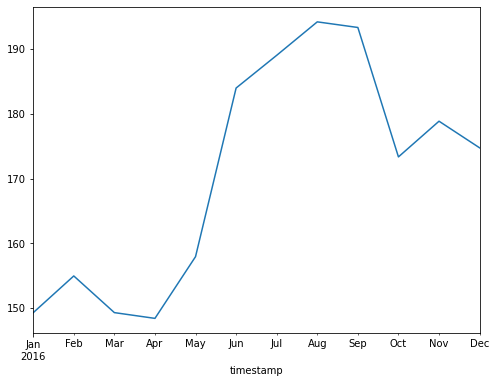

In [ ]:
#Plot rata-rata bulanan penggunaan energi untuk electricity

p = train_month_meter0['meter_reading'].plot(figsize=(8, 6))

#### **1: chilledwater**

In [ ]:
df_meter1 = training.loc[training['meter'] == 1]
train_month_meter1 = df_meter1.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
train_month_meter1.head()

,meter_reading,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
timestamp,,,,,,,,
2016-01-31,151.190740,129339.036584,2.881710,1017.448879,170.892134,3.042725,2.739708,11.390073
2016-02-29,207.669779,132609.634613,7.587270,1017.415063,177.111707,3.293745,3.204605,11.419657
2016-03-31,366.869270,130083.398362,13.402813,1014.355298,165.738977,3.390749,3.780574,11.397121
2016-04-30,388.607063,125573.348198,14.705528,1014.813025,165.762003,3.501553,3.923935,11.358417
2016-05-31,519.057566,125454.559417,19.681988,1013.354689,161.050697,3.069348,4.516473,11.356201


In [ ]:
#Jumlah masing-masing jenis penggunaan gedung dengan chilledwater

df_meter1.primary_use.value_counts()

Education                        1823125
Office                           1117099
Lodging/residential               457833
Entertainment/public assembly     371663
Public services                   179877
Healthcare                        111324
Food sales and service             35132
Other                              22674
Technology/science                 16106
Retail                             16039
Utility                             8783
Parking                             8781
Religious worship                   7327
Manufacturing/industrial            6677
Services                               0
Warehouse/storage                      0
Name: primary_use, dtype: int64

In [ ]:
#Persentase masing-masing jenis penggunaan gedung dengan chilledwater

y = ['Education','Lodging/residential','Office','Entertainment/public assembly','Other','Retail','Parking',
     'Public services','Warehouse/storage','Food sales and service','Religious worship','Healthcare','Utility','Technology/science',
     'Manufacturing/industrial','Services']
df1 = []
for i in y:
  df1.append(round(len(df_meter1.loc[df_meter1['primary_use'] == i])*100 / len(train_merge.loc[train_merge['primary_use'] == i]),2))

df1 = pd.DataFrame(list(zip(y, df1)), columns =['primary_use', 'Persentase gedung dengan chilledwater (%)'])
df1

,primary_use,Persentase gedung dengan chilledwater (%)
0,Education,22.33
1,Lodging/residential,21.33
2,Office,25.42
3,Entertainment/public assembly,16.41
4,Other,9.36
5,Retail,14.24
6,Parking,4.11
7,Public services,10.82
8,Warehouse/storage,0.00
9,Food sales and service,30.79


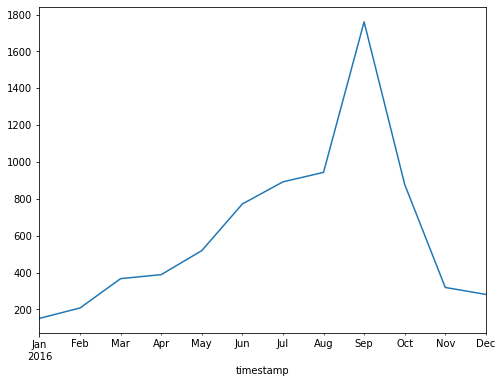

In [ ]:
#Plot rata-rata bulanan penggunaan energi untuk chilledwater

p = train_month_meter1['meter_reading'].plot(figsize=(8, 6))

#### **2: steam**

In [ ]:
df_meter2 = training.loc[training['meter'] == 2]
train_month_meter2 = df_meter2.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
train_month_meter2.head()

,meter_reading,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
timestamp,,,,,,,,
2016-01-31,7254.359339,140911.789974,-0.033145,1017.586255,185.061157,3.260930,6.139641,11.501220
2016-02-29,8164.749524,148761.410728,4.217357,1017.816094,190.559532,3.495266,5.957984,11.558652
2016-03-31,39060.414346,152886.809890,10.753800,1014.797611,161.396122,3.527739,5.462673,11.590204
2016-04-30,39994.506565,140862.359943,11.983611,1015.859458,163.504664,3.616214,5.344281,11.502672
2016-05-31,36696.150873,140269.727571,17.638543,1014.667126,156.338775,3.020395,4.761145,11.497147


In [ ]:
#Jumlah  masing-masing jenis penggunaan gedung dengan steam

df_meter2.primary_use.value_counts()

Education                        1136519
Office                            677872
Lodging/residential               363648
Entertainment/public assembly     242771
Public services                    83882
Healthcare                         77513
Manufacturing/industrial           33820
Food sales and service             17568
Parking                            17568
Services                           17568
Utility                            14944
Other                               8784
Warehouse/storage                   8784
Technology/science                  7472
Religious worship                      0
Retail                                 0
Name: primary_use, dtype: int64

In [ ]:
#Persentase  masing-masing jenis penggunaan gedung dengan steam

y = ['Education','Lodging/residential','Office','Entertainment/public assembly','Other','Retail','Parking',
     'Public services','Warehouse/storage','Food sales and service','Religious worship','Healthcare','Utility','Technology/science',
     'Manufacturing/industrial','Services']
df2 = []
for i in y:
  df2.append(round(len(df_meter2.loc[df_meter2['primary_use'] == i])*100 / len(train_merge.loc[train_merge['primary_use'] == i]),2))

df2 = pd.DataFrame(list(zip(y, df2)), columns =['primary_use', 'Persentase gedung dengan steam (%)'])
df2

,primary_use,Persentase gedung dengan steam (%)
0,Education,13.92
1,Lodging/residential,16.94
2,Office,15.42
3,Entertainment/public assembly,10.72
4,Other,3.63
5,Retail,0.00
6,Parking,8.22
7,Public services,5.04
8,Warehouse/storage,7.85
9,Food sales and service,15.40


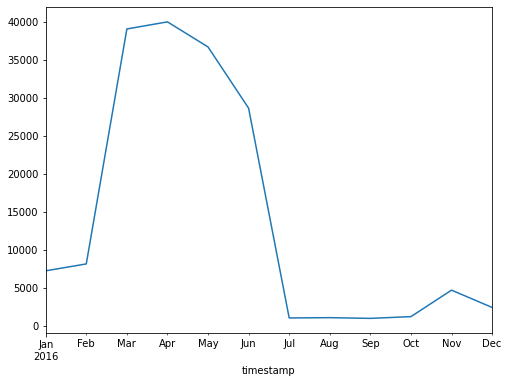

In [ ]:
#Plot rata-rata bulanan penggunaan energi untuk steam

p = train_month_meter2['meter_reading'].plot(figsize=(8, 6))

#### **3: hotwater**

In [ ]:
df_meter3 = training.loc[training['meter'] == 3]
train_month_meter3 = df_meter3.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
train_month_meter3.head()

,meter_reading,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet
timestamp,,,,,,,,
2016-01-31,648.937770,115258.015230,4.870309,1016.138697,166.215665,3.053077,4.619057,11.306579
2016-02-29,559.868475,114662.523621,8.397939,1016.266230,171.901329,3.364427,4.372550,11.299796
2016-03-31,465.095970,114094.269745,12.730339,1014.032645,177.086334,3.396472,3.845761,11.294724
2016-04-30,323.658785,114574.006880,15.161697,1013.558687,180.352718,3.450780,3.367798,11.302562
2016-05-31,208.826512,114615.868350,19.775021,1011.862459,169.648836,3.194049,2.893695,11.301914


In [ ]:
#Jumlah  masing-masing jenis penggunaan gedung dengan hotwater

df_meter3.primary_use.value_counts()

Education                        608604
Office                           289690
Entertainment/public assembly    139188
Lodging/residential               95850
Public services                   79022
Healthcare                        25345
Food sales and service            17564
Technology/science                 8774
Manufacturing/industrial              0
Other                                 0
Parking                               0
Religious worship                     0
Retail                                0
Services                              0
Utility                               0
Warehouse/storage                     0
Name: primary_use, dtype: int64

In [ ]:
#Persentase masing-masing jenis penggunaan gedung dengan hotwater

y = ['Education','Lodging/residential','Office','Entertainment/public assembly','Other','Retail','Parking',
     'Public services','Warehouse/storage','Food sales and service','Religious worship','Healthcare','Utility','Technology/science',
     'Manufacturing/industrial','Services']
df3 = []
for i in y:
  df3.append(round(len(df_meter3.loc[df_meter3['primary_use'] == i])*100 / len(train_merge.loc[train_merge['primary_use'] == i]),2))

df3 = pd.DataFrame(list(zip(y, df3)), columns =['primary_use', 'Persentase gedung dengan hotwater (%)'])
df3

,primary_use,Persentase gedung dengan hotwater (%)
0,Education,7.45
1,Lodging/residential,4.47
2,Office,6.59
3,Entertainment/public assembly,6.15
4,Other,0.00
5,Retail,0.00
6,Parking,0.00
7,Public services,4.75
8,Warehouse/storage,0.00
9,Food sales and service,15.39


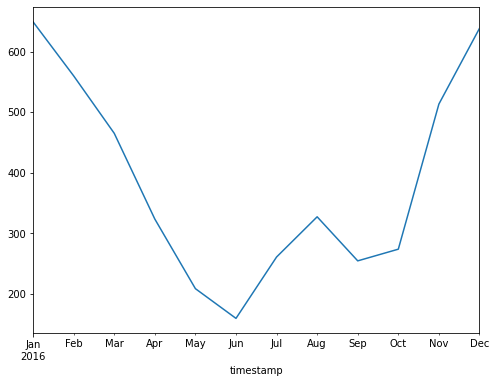

In [ ]:
#Plot rata-rata bulanan penggunaan energi untuk hotwater

p = train_month_meter3['meter_reading'].plot(figsize=(8, 6))


#**🥇Saving the Pre-processed Data**

In [ ]:
#Saving the preprocessed Data for future use/analysis

train_merge.to_csv("/content/files/AshraeEnergy_PreProcessed.csv", encoding='utf8')


#**⛅ Terima Kasih ⛅**